In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer.pitch as Pitch
import seaborn as sns

In [4]:
#Want to load the pandas dataframe for Ronaldo
df=pd.read_csv('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Cristiano Ronaldo vs Granada 9-1.csv')

In [5]:
#Want to list nunber of events in Ronaldo's dataset. Helps with the legend.
event_counts=df['Event'].value_counts()
print(event_counts)

Successful Pass        21
Shot                    7
Cross                   6
  Unsuccessful Pass     5
Goal                    5
Dribble                 3
Shot on Target          1
Free kick               1
Name: Event, dtype: int64


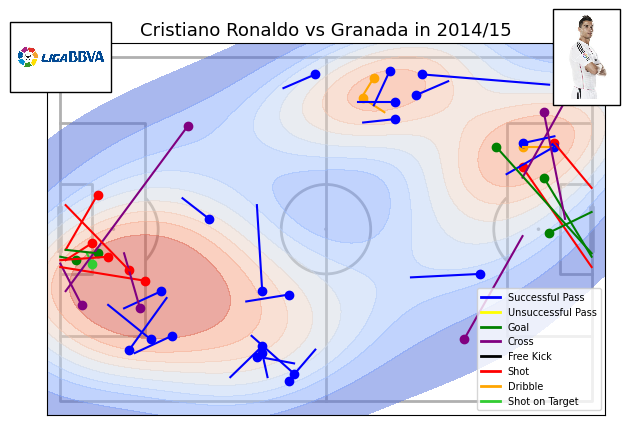

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# Create the pitch
pitch = Pitch(pitch_type='wyscout', axis=True, label=True)
fig, ax = pitch.draw()

# Creating the heatmap using kdeplot
sns.kdeplot(
    x=df['X'],  # Use x= for X coordinates
    y=df['Y'],  # Use y= for Y coordinates
    fill=True,  # Fill the contours for better visualization
    cmap='coolwarm',  # Choose a colormap for the heatmap
    ax=ax,  # Use the same pitch axis
    alpha=0.5  # Transparency
)

for X in range(len(df['X'])):
     if df['Event'][X] == 'Successful Pass':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='blue')
        plt.scatter(df['X'][X], df['Y'][X], color='blue')
     if df['Event'][X] == 'Unsuccessful Pass':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='yellow')
        plt.scatter(df['X'][X], df['Y'][X], color='yellow')
     if df['Event'][X] == 'Goal':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='green')
        plt.scatter(df['X'][X], df['Y'][X], color='green')
     if df['Event'][X] == 'Cross':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='purple')
        plt.scatter(df['X'][X], df['Y'][X], color='purple')
     if df['Event'][X] == 'Free Kick':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='black')
        plt.scatter(df['X'][X], df['Y'][X], color='black')
     if df['Event'][X] == 'Shot':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='red')
        plt.scatter(df['X'][X], df['Y'][X], color='red')
     if df['Event'][X] == 'Shot on Target':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='limegreen')
        plt.scatter(df['X'][X], df['Y'][X], color='limegreen')
     if df['Event'][X] == 'Dribble':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='orange')
        plt.scatter(df['X'][X], df['Y'][X], color='orange')

#legend
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Successful Pass'),
    Line2D([0], [0], color='yellow', lw=2, label='Unsuccessful Pass'),
    Line2D([0], [0], color='green', lw=2, label='Goal'),
    Line2D([0], [0], color='purple', lw=2, label='Cross'),
    Line2D([0], [0], color='black', lw=2, label='Free Kick'),
    Line2D([0], [0], color='red', lw=2, label='Shot'),
    Line2D([0], [0], color='orange', lw=2, label='Dribble'),
    Line2D([0], [0], color='limegreen', lw=2, label='Shot on Target'),   
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=7)

# Player image (replace with valid path)
player_image = Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Cristiano Ronaldo 2014-15.jpg')
imagebox = OffsetImage(player_image, zoom=0.15)
ab = AnnotationBbox(imagebox, (99, 0), frameon=True, xycoords='data')
ax.add_artist(ab)

#Competition image 
competition_image=Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/liga-bbva-2014-2015.jpg'
)
imagebox = OffsetImage(competition_image, zoom=0.05)
ab = AnnotationBbox(imagebox, (0, 0), frameon=True, xycoords='data')
ax.add_artist(ab)

# Remove the x and y axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

# Add a title to the heatmap
plt.title('Cristiano Ronaldo vs Granada in 2014/15', color='black', size=13)
plt.savefig('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Cristiano Ronaldo Heat Map vs Granada 2014:15.png', dpi=300, bbox_inches='tight')

plt.show()